# 第四回レポート課題
## 1. 下記のサンプルコードを実行してMNISTデータを学習してください。
simple_convnet.pyの実装も見てみましょう。

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
train loss:2.2985236639116025
=== epoch:1, train acc:0.328, test acc:0.406 ===
train loss:2.2961250800248987
train loss:2.29213061753009
train loss:2.2857610717972765
train loss:2.26859022991973
train loss:2.2551456697559273
train loss:2.2517701637172225
train loss:2.2212257464081997
train loss:2.2049523820755663
train loss:2.15625072862708
train loss:2.161120738111466
train loss:2.101032097888601
train loss:2.0884233122470643
train loss:1.9850553179261659
train loss:1.8900356507548002
train loss:1.870897070444839
train loss:1.8632546037087374
train loss:1.8163362420795277
train loss:1.6136144009693232
train loss:1.5683622408616866
train loss:1.4833525319999503
train loss:1.4984999309479086
tra

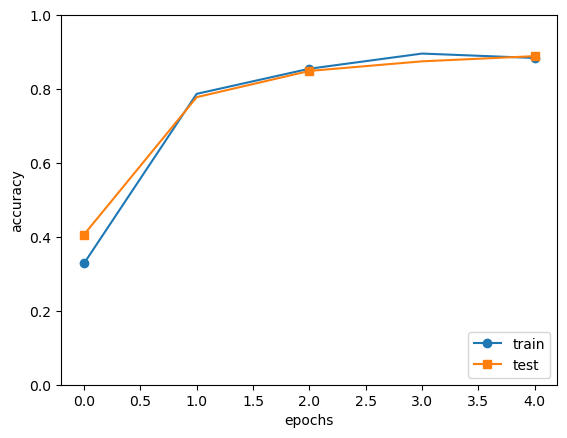

In [4]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer


# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 5 #20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()